In [1]:
import pandas as pd, numpy as np
import sys, os
import matplotlib.pyplot as plt, seaborn as sns
sys.path.append(os.path.abspath('..'))
from src.loaders import load_train_merged
pd.set_option("display.max_columns", 120)

train = load_train_merged()
train.shape, train["isFraud"].value_counts(normalize=True)

Loading from: C:\Users\domen\Projects\ieee-fraud\data\raw\train_transaction.csv


((590540, 434),
 isFraud
 0    0.96501
 1    0.03499
 Name: proportion, dtype: float64)

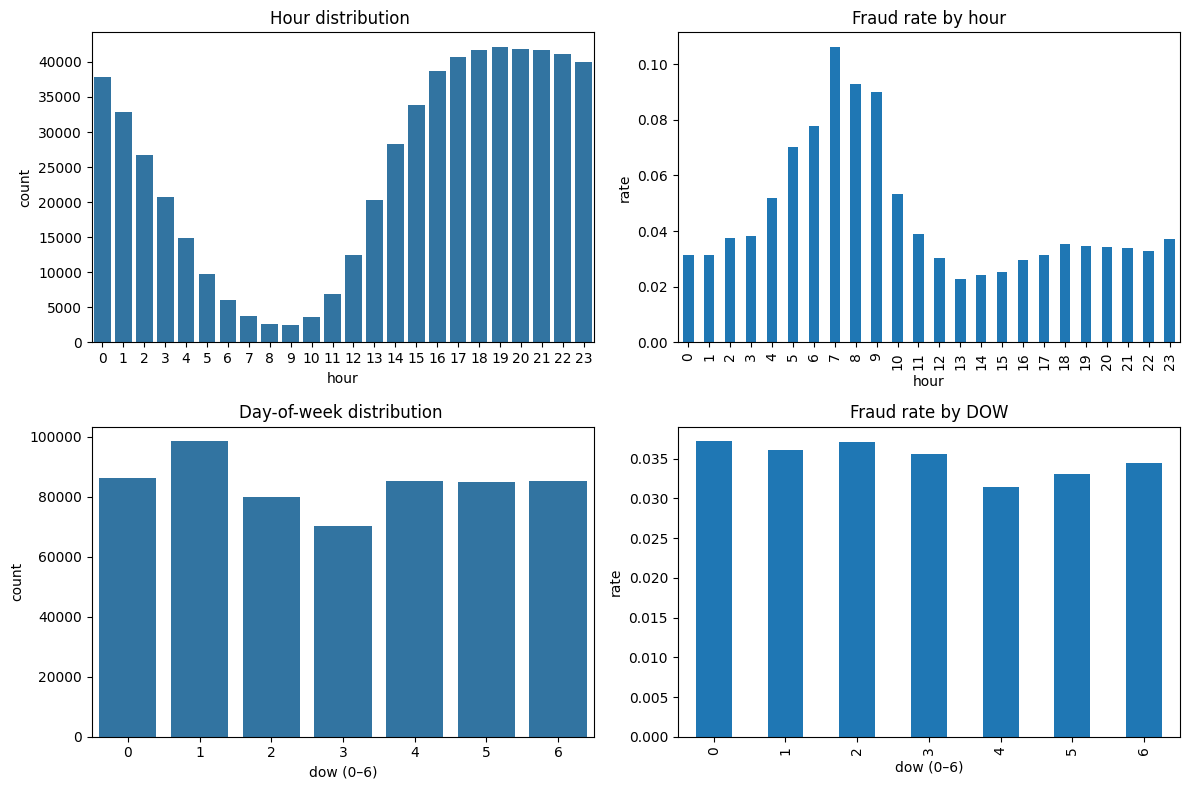

In [6]:
train["day"]  = (train["TransactionDT"] // (24*60*60)).astype("int32")
train["hour"] = ((train["TransactionDT"] // 3600) % 24).astype("int16")
train["dow"]  = (train["day"] % 7).astype("int8")   # 0..6, arbitrary reference start

# plotting: 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Volume by hour (sample for speed)
sns.countplot(x="hour", data=train, ax=ax[0,0])
ax[0,0].set_title("Hour distribution ")

# Fraud rate by hour
train.groupby("hour")["isFraud"].mean().plot(kind="bar", ax=ax[0,1])
ax[0,1].set_title("Fraud rate by hour"); ax[0,1].set_xlabel("hour"); ax[0,1].set_ylabel("rate")

# Volume by Day of week
sns.countplot(x="dow", data=train, ax=ax[1,0])
ax[1,0].set_title("Day-of-week distribution "); ax[1,0].set_xlabel("dow (0–6)")

# Fraud rate by day of week
train.groupby("dow")["isFraud"].mean().plot(kind="bar", ax=ax[1,1])
ax[1,1].set_title("Fraud rate by DOW"); ax[1,1].set_xlabel("dow (0–6)"); ax[1,1].set_ylabel("rate")

plt.tight_layout(); plt.show()

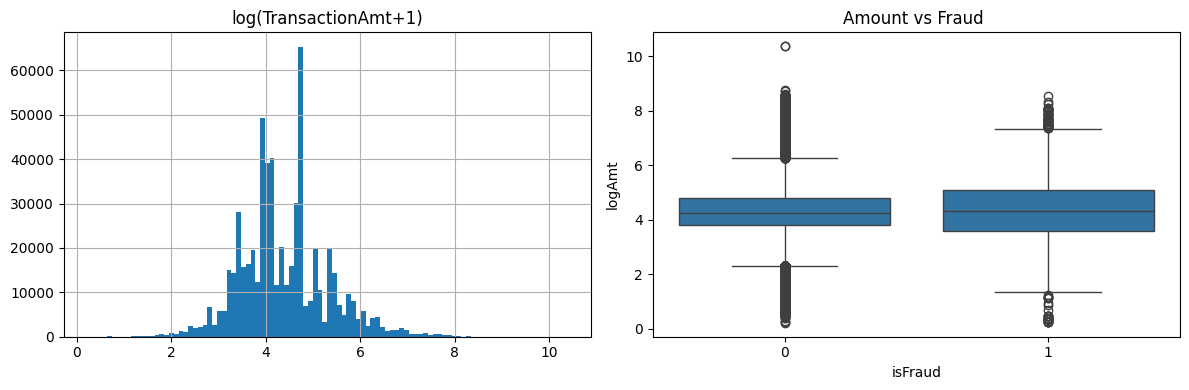

In [7]:
train["logAmt"] = np.log1p(train["TransactionAmt"])
fig, ax = plt.subplots(1,2, figsize=(12,4))
train["logAmt"].hist(bins=100, ax=ax[0]); ax[0].set_title("log(TransactionAmt+1)")
sns.boxplot(x="isFraud", y="logAmt", data=train, ax=ax[1])
ax[1].set_title("Amount vs Fraud ")
plt.tight_layout(); plt.show()

ProductCD
C    0.116873
S    0.058996
H    0.047662
R    0.037826
W    0.020399
Name: isFraud, dtype: float64

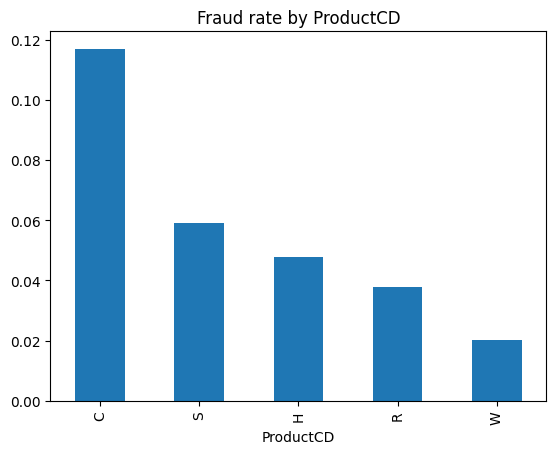

In [8]:
if "ProductCD" in train.columns:
    fr = train.groupby("ProductCD")["isFraud"].mean().sort_values(ascending=False)
    display(fr)
    fr.plot(kind="bar", title="Fraud rate by ProductCD"); plt.show()